In [ ]:
#pip install numba --upgrade
#pip install pygraphviz
import sys
sys.path.insert(0, "/Users/sihoryu/Desktop/AI_MachineLearning/aiclass/1731095004_SiHoRyu/")

import HW2.graph as tfg
import HW2.deep_learning_networks as tfn
import HW2.enums as tfe
import datasource.mnist as mnist
import HW2.functions as tff
import math
import numba
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
model_params_dir = "/Users/yhhan/temp3"

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

Multi Layer Network Model - ID: VM7FDA6R


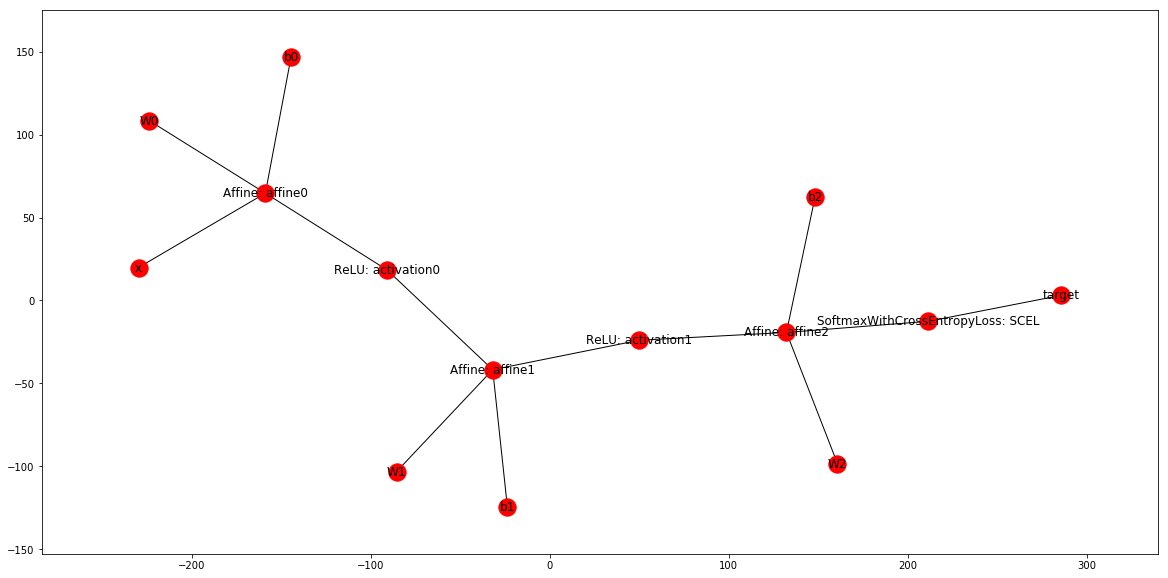

In [3]:
n.draw_and_show(figsize=(20, 10))

In [4]:
data = mnist.MNIST_Data()
#data = mnist.Fashion_MNIST_Data()

In [5]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
%timeit -n1 -r1 n.learning(max_epoch=50, data=data, batch_size=batch_size, print_period=1, is_numba=True, verbose=False)

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1058
-- Learning Started --
Epoch   0 Completed - Train Error: 2.297801 - Validation Error: 2.301073 - Test Accuracy: 0.105800
Epoch   1 Completed - Train Error: 0.393199 - Validation Error: 0.399093 - Test Accuracy: 0.885600
Epoch   2 Completed - Train Error: 0.285987 - Validation Error: 0.266476 - Test Accuracy: 0.922300
Epoch   3 Completed - Train Error: 0.239173 - Validation Error: 0.214635 - Test Accuracy: 0.936900
Epoch   4 Completed - Train Error: 0.175053 - Validation Error: 0.182468 - Test Accuracy: 0.945200
Epoch   5 Completed - Train Error: 0.125445 - Validation Error: 0.160264 - Test Accuracy: 0.951800
Epoch   6 Completed - Train Error: 0.174601 - Validation Error: 0.144075 - Test Accuracy: 0.956900
Epoch   7 Completed - Train Error: 0.143285 - Validation Error: 0.131872 - Test Accuracy: 0.960000
Epoch   8 Completed - Train Error: 0.135275 - Validation Error: 0.122395 - Test Accuracy: 0.962700
Epoch   9 Completed - Train Error: 0.126367 - Validation Error

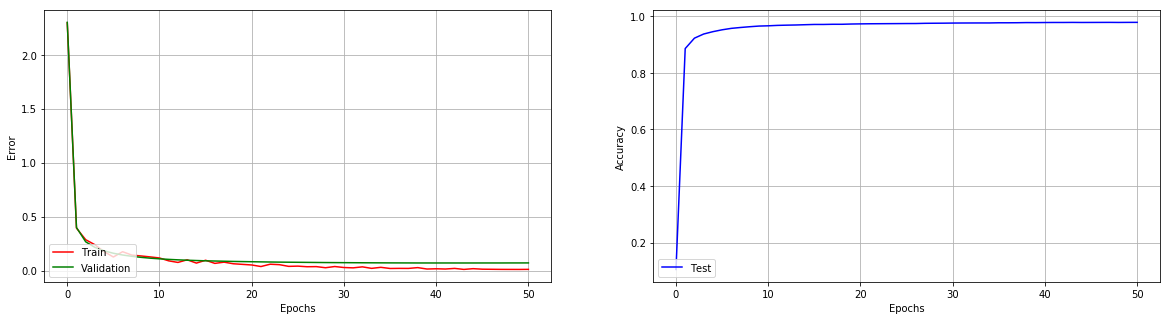

In [6]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 217, Prediction: Five, Ground Truth: Six
False Prediction Index: 247, Prediction: Two, Ground Truth: Four
False Prediction Index: 259, Prediction: Zero, Ground Truth: Six
False Prediction Index: 321, Prediction: Seven, Ground Truth: Two
False Prediction Index: 340, Prediction: Three, Ground Truth: Five


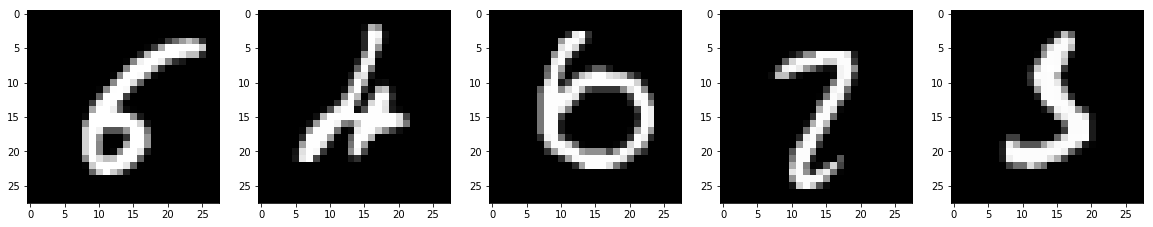

In [7]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

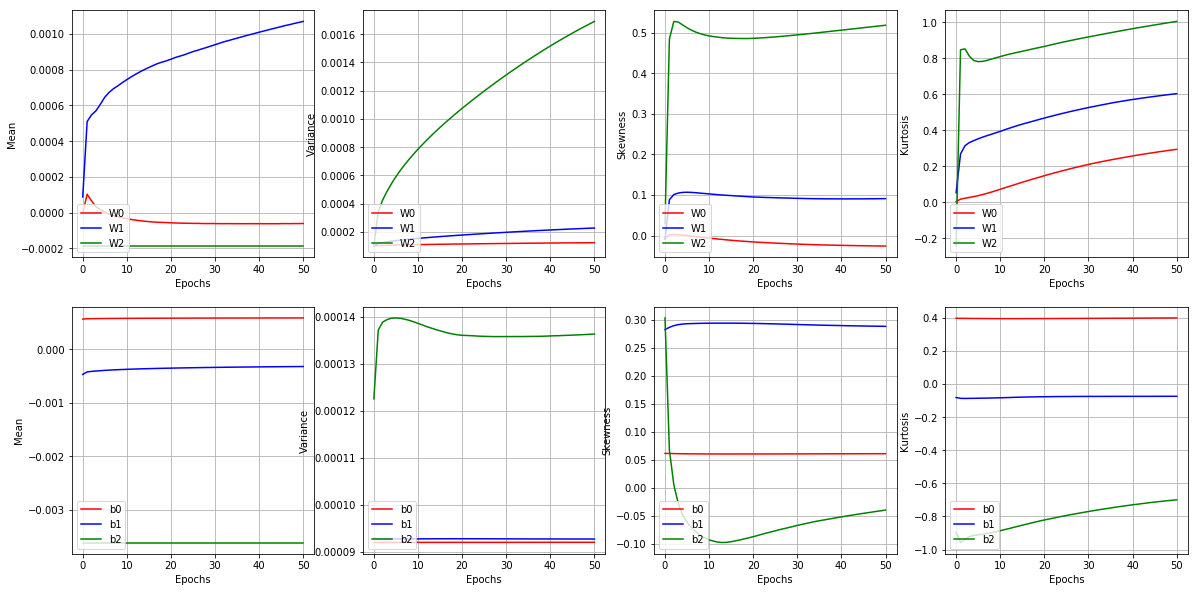

In [8]:
n.draw_param_description(figsize=(20, 10))